<a href="https://colab.research.google.com/github/alekya0221/DS_Python_ExcelR/blob/main/Alekya_SLR_DeliveryTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset
deli = pd.read_csv('/content/delivery_time.csv')

In [3]:
deli.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dataset =deli.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [7]:
dataset.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
#Independent and Dependent Variables
X = dataset.iloc[:,1].values
y = dataset.iloc[:,0].values

In [9]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [10]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [11]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [12]:
X_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [13]:
X_test

array([10,  3,  5,  4,  4])

In [14]:
y_train

array([19.83, 12.03,  8.  , 19.  , 17.83, 29.  , 19.75, 15.35, 13.75,
       18.75,  9.5 , 18.11, 24.  , 21.  , 14.88, 16.68])

In [15]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [16]:
#Apply the Model
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [17]:
# Predicting the Test set results
y_pred = regressor.predict(X_test.reshape(-1,1))

In [18]:
y_pred

array([[23.97793478],
       [10.70456522],
       [14.49695652],
       [12.60076087],
       [12.60076087]])

In [19]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score
  
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
rsquare = r2_score(y_true=y_test, y_pred=y_pred)
  
print("MAPE:",mape)
print("Adj.Rsquare:", rsquare) 

MAPE: 0.19464294628347842
Adj.Rsquare: -0.09171780724674217


In [21]:
#Correlation Between Variables
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [22]:
#Data Visualisation

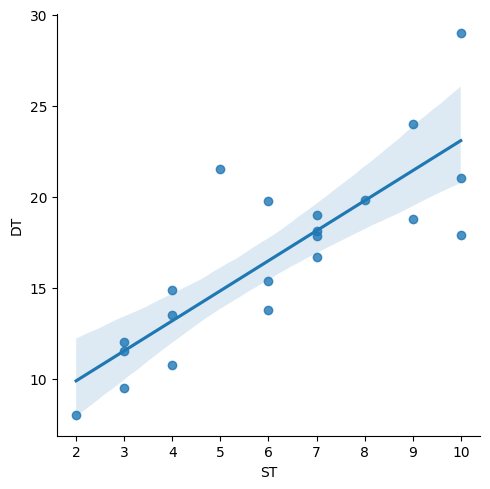

In [24]:
import seaborn as sns
sns.lmplot(x="ST", y="DT", data=dataset)

In [25]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = dataset).fit()

In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [27]:
#model.predict(data_pred)

In [28]:
#Correlation Between Variables
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


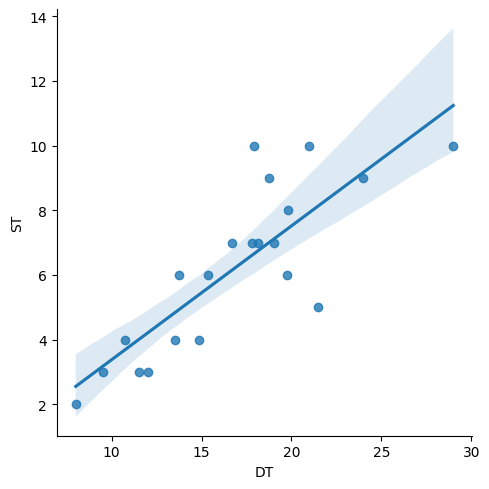

In [30]:
#Data Visualzation
import seaborn as sns
sns.lmplot(x="DT", y="ST", data=dataset)

In [34]:
#Predict for 21 and 5
newdata=pd.Series([21,5])
data_pred=pd.DataFrame(newdata,columns=['ST'])
data_pred

,ST
0,21
1,5


In [35]:
#model predict ols model
model.predict(data_pred)

0    41.212152
1    14.827833
dtype: float64

In [ ]:
#model1 with reshape

In [36]:
y_pred

array([[23.97793478],
       [10.70456522],
       [14.49695652],
       [12.60076087],
       [12.60076087]])

In [37]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [38]:
# Predicting the Test set results
y_pred = regressor.predict(X_test.reshape(-1,1))


In [39]:
y_pred

array([[23.97793478],
       [10.70456522],
       [14.49695652],
       [12.60076087],
       [12.60076087]])

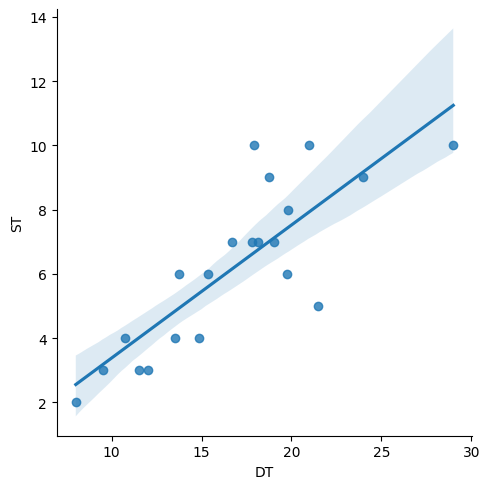

In [41]:
#Data Visualzation
import seaborn as sns
sns.lmplot(x="DT", y="ST", data=dataset)

In [42]:
#R squared values ols
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [45]:
#Predict for 33 and 44
newdata=pd.Series([33,44])
data_pred=pd.DataFrame(newdata,columns=['DT'])
data_pred

,DT
0,33
1,44


In [46]:
#Regressor predict for sklearn.linear regression
regressor.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[67.59043478],
       [88.44858696]])

In [47]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)